# Averaged data

In [1]:
from pandas import HDFStore, DataFrame, Series
from tqdm.auto import tqdm
from pandas import concat


def load_averaged_data(path: str) -> tuple[DataFrame, Series, Series]:
    loaded_data: dict[str, DataFrame] = {}

    # Open the HDF5 file
    with HDFStore(path) as store:
        # Iterate through the keys (group names) in the HDF5 file
        for key in tqdm(store.keys(), desc='Loading data'):
            # Load each DataFrame and store it in the dictionary
            loaded_data[key] = store[key]

    concated_df_avgs = concat(
        [loaded_data[key][("Average", "Balanced Accuracy")] for key in loaded_data.keys()],
        axis=1,
        keys=[el[1:] for el in loaded_data.keys()],
    )
    concated_df_errs = concat(
        [loaded_data[key][("Standard error", "Balanced Accuracy")] for key in loaded_data.keys()],
        axis=1,
        keys=[el[1:] for el in loaded_data.keys()],
    )
    df_avgs = concated_df_avgs.unstack().reset_index()
    df_avgs.columns = ["side", "classifier", "balanced accuracy"]

    df_errs = concated_df_errs.unstack().reset_index()
    df_errs.columns = ["side", "classifier", "balanced accuracy"]
    upper_errs = df_errs["balanced accuracy"]
    lower_errs = df_errs["balanced accuracy"]
    return df_avgs, upper_errs, lower_errs, df_errs
    
def make_linerrorplot(data: DataFrame, lower_errs: Series, upper_errs: Series, path_to_save: str) -> None:
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    
    plt.figure(figsize=(3, 7))
    sns.set_style("darkgrid")
    
    palette = sns.color_palette("colorblind")
    # sns.scatterplot(data=df, x='side', y='accuracy', hue='classifier')
    plt.errorbar(
        x=data["side"],
        y=data["balanced accuracy"],
        xerr=None,
        yerr=(lower_errs, upper_errs),
        # label=custom_label,
        elinewidth=5,
        linestyle="none",
        markersize=1,
        marker=".",
        color=palette[0],
        ecolor=(*palette[0], 0.3),
    )
    plt.ylim(0.5, 1.0)
    
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()
    # legend off
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    # 

## USILaughs

In [2]:
path_to_save_data_avgs = "../data.nosync/usilaughs/results/loso_nested_avg_bilateral_TABPFN.h5"
# Create an empty dictionary to store the loaded DataFrames
df_avgs, upper_errs, lower_errs, df_errs = load_averaged_data(path_to_save_data_avgs)

Loading data:   0%|          | 0/13 [00:00<?, ?it/s]

In [3]:
df_avgs

,side,classifier,balanced accuracy
0,"('left', 'diff')",XGBClassifier,0.541771
1,"('left', 'diff')",TabPFNClassifier,0.524514
2,"('left', 'diff')",DummyClassifier,0.337500
3,"('left', 'right')",XGBClassifier,0.747569
4,"('left', 'right')",TabPFNClassifier,0.740868
5,"('left', 'right')",DummyClassifier,0.337500
6,"('left+diff', 'right+diff')",XGBClassifier,0.723507
7,"('left+diff', 'right+diff')",TabPFNClassifier,0.665903
8,"('left+diff', 'right+diff')",DummyClassifier,0.337500
9,"('left+right', 'left+diff')",XGBClassifier,0.557882


In [4]:
print(df_avgs['classifier'].nunique())
print(df_avgs['classifier'].unique())

1
['XGBClassifier']


In [5]:
maxes = (
    concat([df_errs["balanced accuracy"], df_avgs], axis=1, keys=["errors", "averages"])
    .groupby(("averages", "side"))
    .max()
)
display(maxes * 100)


errors  \
                             balanced accuracy   
(averages, side)                                 
('left', 'diff')                      1.503559   
('left', 'right')                     1.346740   
('left+diff', 'right+diff')           1.648184   
('left+right', 'left+diff')           1.920014   
('left+right', 'right+diff')          1.954736   
('right', 'diff')                     1.727742   
diff                                  0.316621   
left                                  0.371473   
left+diff                             0.352944   
left+right                            0.321256   
left+right+diff                       0.325574   
right                                 0.311720   
right+diff                            0.312673   

                                                                       averages  \
                                                                     classifier   
(averages, side)                                                                  
('left', 'diff')              XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left', 'right')             XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+diff', 'right+diff')   XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+right', 'left+diff')   XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+right', 'right+diff')  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('right', 'diff')             XGBClassifierXGBClassifierXGBClassifierXGBClas...   
diff                          XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left                          XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+diff                     XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+right                    XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+right+diff               XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right                         XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right+diff                    XGBClassifierXGBClassifierXGBClassifierXGBClas...   

                                                
                             balanced accuracy  
(averages, side)                                
('left', 'diff')                     52.202667  
('left', 'right')                    74.858667  
('left+diff', 'right+diff')          73.152222  
('left+right', 'left+diff')          54.487556  
('left+right', 'right+diff')         54.551556  
('right', 'diff')                    60.667556  
diff                                 59.367556  
left                                 62.867111  
left+diff                            69.309111  
left+right                           74.534889  
left+right+diff                      73.972444  
right                                74.967556  
right+diff                           74.106667

## MWC2022

In [6]:
path_to_save_data_avgs = "../data.nosync/mwc2022/results/loso_nested_avg_bilateral.h5"
# Create an empty dictionary to store the loaded DataFrames
df_avgs, upper_errs, lower_errs, df_errs = load_averaged_data(path_to_save_data_avgs)

Loading data:   0%|          | 0/13 [00:00<?, ?it/s]

In [7]:
display(
    concat([df_errs["balanced accuracy"], df_avgs], axis=1, keys=["errors", "averages"])
    .groupby(("averages", "side"))
    .max()*100
)


errors  \
                             balanced accuracy   
(averages, side)                                 
('left', 'diff')                      0.692550   
('left', 'right')                     1.712150   
('left+diff', 'right+diff')           1.766094   
('left+right', 'left+diff')           1.594677   
('left+right', 'right+diff')          1.800106   
('right', 'diff')                     0.762256   
diff                                  0.252631   
left                                  0.347747   
left+diff                             0.310618   
left+right                            0.352193   
left+right+diff                       0.341468   
right                                 0.322826   
right+diff                            0.314416   

                                                                       averages  \
                                                                     classifier   
(averages, side)                                                                  
('left', 'diff')              XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left', 'right')             XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+diff', 'right+diff')   XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+right', 'left+diff')   XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('left+right', 'right+diff')  XGBClassifierXGBClassifierXGBClassifierXGBClas...   
('right', 'diff')             XGBClassifierXGBClassifierXGBClassifierXGBClas...   
diff                          XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left                          XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+diff                     XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+right                    XGBClassifierXGBClassifierXGBClassifierXGBClas...   
left+right+diff               XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right                         XGBClassifierXGBClassifierXGBClassifierXGBClas...   
right+diff                    XGBClassifierXGBClassifierXGBClassifierXGBClas...   

                                                
                             balanced accuracy  
(averages, side)                                
('left', 'diff')                     47.121322  
('left', 'right')                    68.514557  
('left+diff', 'right+diff')          71.775548  
('left+right', 'left+diff')          68.529689  
('left+right', 'right+diff')         62.732600  
('right', 'diff')                    49.446813  
diff                                 74.174272  
left                                 74.327631  
left+diff                            76.256658  
left+right                           73.013984  
left+right+diff                      74.994109  
right                                69.846509  
right+diff                           74.782400

# Total data

In [1]:
from pandas import DataFrame, concat, MultiIndex, Series
from collections import defaultdict
from pandas import concat
from numpy import nanstd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import itertools
from pandas import HDFStore, DataFrame
from tqdm.auto import tqdm
import pandas as pd
from scipy.stats import shapiro, anderson, ttest_ind
from statsmodels.stats.multitest import multipletests


def calculate_fold_df(data: DataFrame, n_folds: int) -> DataFrame:
    avgs = concat(
        [fold_res["Balanced Accuracy"] for fold_res in data.values()],
        axis=1,
        keys=range(5),
    ).mean(axis=1)
    errs = concat(
        [fold_res["Balanced Accuracy"] for fold_res in data.values()],
        axis=1,
        keys=range(n_folds),
    ).apply(lambda x: nanstd(x) / ((len(x - 1)) ** 0.5) if len(x) > 1 else 1, axis=1)
    stds = concat(
        [fold_res["Balanced Accuracy"] for fold_res in data.values()],
        axis=1,
        keys=range(n_folds),
    ).apply(lambda x: nanstd(x), axis=1)
    return concat(
        [avgs, errs, stds],
        axis=1,
        keys=["Balanced Accuracy", "Standard Error", "Standard Deviation"],
    )


def concatenate_prepared_data(data: dict[str, DataFrame]) -> DataFrame:
    concated_df_dict: dict[DataFrame, Series] = {}
    sides: list[str] = ["left", "right", "lxrx", "rxlx"]
    for side in sides:
        concated_df_dict[side] = concat(
            [
                data[key][
                    ["Balanced Accuracy", "Standard Error", "Standard Deviation"]
                ].sort_index()
                for key in data.keys()
                if side in key
            ],
            axis=0,
            keys=[key[1:5] for key in data.keys() if side in key],
        )
        concated_df_dict[side].index = concated_df_dict[side].index.droplevel(0)

    all_results = concat(
        list(concated_df_dict.values()),
        axis=0,
        keys=sides,
        # ignore_index=True,
    )
    all_results = all_results.reset_index()
    all_results.columns = [
        "Side",
        "Model",
        "Balanced Accuracy",
        "Standard Error",
        "Standard Deviation",
    ]
    return all_results


def load_prepare_data(path_to_all_data: str, n_folds: int) -> DataFrame:
    loaded_data = defaultdict(lambda: defaultdict(lambda: dict()))

    # # Open the HDF5 file
    # with HDFStore(path_to_all_data) as store:
    #     # Iterate through the keys (group names) in the HDF5 file
    #     for key in tqdm(store.keys(), desc="Loading data"):
    #         # Load each DataFrame and store it in the dictionary
    #         data = store[key]
    #         split_key = key.split("_")
    #         loaded_data[split_key[0]][split_key[1]][split_key[2]] = data

    # loaded_data_correct = {
    #     f"{key1}_{key2}": calculate_fold_df(loaded_data[key1][key2], n_folds=n_folds)
    #     for key1 in loaded_data.keys()
    #     for key2 in loaded_data[key1].keys()
    # }

    # return concatenate_prepared_data(data=loaded_data_correct)
    with HDFStore(path_to_all_data) as store:
        # Iterate through the keys (group names) in the HDF5 file
        loaded_data = {
            key: store[key]
            for key in tqdm(store.keys(), desc="Loading data")
        }
        all_results = pd.concat(loaded_data.values(), axis=0, keys=loaded_data.keys(), names=["ID", "Model"])
        all_results = all_results.reset_index(inplace=False, drop=False)
        all_results['Side'] = all_results['ID'].apply(lambda x: x.split("_")[0])
        all_results['Random Seed'] = all_results['ID'].apply(lambda x: x.split("_")[1])
        all_results['Outer fold'] = all_results['ID'].apply(lambda x: x.split("_")[2])
        all_results = all_results.drop(columns=['ID'])
        return all_results


def remove_dummy(data: DataFrame) -> DataFrame:
    return data[data["Model"] != "DummyClassifier"]


def make_violin_accuracy(
    data: DataFrame,
    path_to_save_fig: str | None = None,
    small_fontsize: int = 14,
    medium_fontsize: int = 18,
    large_fontsize: int = 20,
    dummy_val: float = 0.5,
    xlim: tuple[float, float] | None = None,
):
    # set seaborn style
    sns.set_style("darkgrid")

    # # set latex font
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"
    # plt.rcParams.update({"font.size": figsize *8})
    plt.rcParams["axes.grid"] = True

    # increase font size
    plt.rc("font", size=small_fontsize)  # controls default text sizes
    plt.rc("axes", titlesize=medium_fontsize)  # fontsize of the axes title
    plt.rc("axes", labelsize=large_fontsize)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("legend", fontsize=medium_fontsize)  # legend fontsize
    plt.rc("figure", titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})

    ax = sns.violinplot(
        data=data,
        y="Train-Test",
        x="Balanced Accuracy",
        palette="colorblind",
        orient="h",
    )
    # annotator = Annotator(
    #     ax,
    #     list(itertools.combinations(sides, 2)),
    #     data=data,
    #     x="Balanced Accuracy",
    #     y="Train-Test",
    #     orient="h",
    #     order=sides,
    # )
    # annotator.configure(
    #     test="Wilcoxon",
    #     comparisons_correction="HB",
    #     text_format="star",
    #     loc="outside",
    # )
    # annotator.apply_and_annotate()

    # set vertical line at 0.5
    plt.axvline(x=dummy_val, color="black", linestyle="--", linewidth=1)
    if xlim:
        plt.xlim(xlim)
    if path_to_save_fig is not None:
        plt.savefig(path_to_save_fig, bbox_inches="tight")
    plt.show()


def clean_side_names(
    data: DataFrame, renaming_dict: dict[str, str] | None = None
) -> DataFrame:
    if renaming_dict is None:
        renaming_dict = {
            "left": "Left-Left",
            "right": "Right-Right",
            "lxrx": "Left-Right",
            "rxlx": "Right-Left",
        }
    renaming_dict: dict[str, str]
    data.loc[:, "Side"] = data.loc[:, "Side"].map(renaming_dict)
    return data.rename(columns={"Side": "Train-Test"}, inplace=False)
    

def test_normality(all_xgb_results: dict) -> None:
    # test the normality of all three data distributions
    for side, data in all_xgb_results.items():
        print(f"Shapiro-Wilk test for normality on data set {side}:")
        print(shapiro(data["Balanced Accuracy"]))
        # make the histogram with kernel of the data distribution
        sns.distplot(
            data["Balanced Accuracy"],
            hist=True,
            kde=True,
            color="darkblue",
            hist_kws={"edgecolor": "black"},
            kde_kws={"linewidth": 4},
        )
        plt.show()
        print(f"Anderson-Darling test for normality on data set {side}:")
        print(anderson(data["Balanced Accuracy"]))


def simple_t_test(
    side_combinations: list[str], all_xgb_results: dict[str, DataFrame]
) -> dict[str, tuple]:
    t_test_results = {}
    for combination in side_combinations:
        el1 = all_xgb_results[combination[0]]["Balanced Accuracy"]
        el2 = all_xgb_results[combination[1]]["Balanced Accuracy"]
        t, p = ttest_ind(el1, el2)
        t_test_results[combination] = (t, p, p > 0.05)
    return t_test_results

from scipy import stats
from numpy import ndarray, mean, sqrt


def corrected_repeated_kfold_cv_test(
    a: ndarray, b: ndarray, n2: int, n1: int
) -> tuple[float, float]:
    if not isinstance(a, ndarray) or not isinstance(b, ndarray):
        raise ValueError("Inputs must be numpy arrays")
    x = a - b
    m = mean(x)
    sigma_squared = ((x - m) ** 2 / (len(x) - 1)).sum()
    denominator = 1 / len(x) + n2 / n1
    t = m / sqrt(denominator * sigma_squared)
    pval = stats.t.sf(abs(t), len(x)-1 + n1/n2) * 2
    return t, pval


def corrected_t_test(
    side_combinations: list[str], all_xgb_results: dict[str, DataFrame], n1, n2
) -> dict[str, tuple]:
    t_test_results = {}
    for combination in side_combinations:
        el1 = all_xgb_results[combination[0]]["Balanced Accuracy"]
        el2 = all_xgb_results[combination[1]]["Balanced Accuracy"]
        t, p = corrected_repeated_kfold_cv_test(el1.values, el2.values, n1=n1, n2=n2)
        t_test_results[combination] = (t, p, p > 0.05)
    
    p_values = [el[1] for el in t_test_results.values()]
    # apply p-value correction
    multi_hypothesis_result = multipletests(
    p_values,
    alpha=0.05,
    method="holm",
)   
    t_test_results = {
        key: (value[0], multi_hypothesis_result[1][i], multi_hypothesis_result[0][i])
        for i, (key, value) in enumerate(t_test_results.items())
    }
    return t_test_results


def cleanup_opposite_side_name(side_name: str) -> str:
    side_name = side_name[2:-1]
    sides = side_name.split(", ")
    train_side_name = sides[0]
    test_side_name = sides[1]
    return f"{train_side_name} -- {test_side_name}"

## USILaughs

In [2]:
n_tot = 810
n1 = 29/30 * n_tot
n2 = 1/30 * n_tot

In [3]:
path_to_save_data_avgs = "../data.nosync/usilaughs/results/loso_nested_all_bilateral_TABPFN.h5"

order = [
    "Left-Left",
    "Right-Right",
    "Left-Right",
    "Right-Left",
]
# Create an empty dictionary to store the loaded DataFrames
all_results = load_prepare_data(path_to_save_data_avgs, n_folds=32)
# all_results_no_dummy = remove_dummy(data=all_results)
all_results_no_dummy = all_results

renaming_dict = {
    side_name: f"{side_name[1:]} -- {side_name[1:]}" if "(" not in side_name 
    else cleanup_opposite_side_name(side_name) 
    for side_name in all_results_no_dummy['Side'].unique()
}
all_results_no_dummy = clean_side_names(data=all_results_no_dummy,
                                        renaming_dict=renaming_dict)



Loading data:   0%|          | 0/832 [00:00<?, ?it/s]

In [5]:
all_seed_avgs = all_results_no_dummy.groupby(["Train-Test", "Model", 'Random Seed']).mean(numeric_only=True)
all_seed_avgs = all_seed_avgs.reset_index(drop=False)

In [6]:
from scipy.stats import sem
mean_dummy = all_seed_avgs[all_seed_avgs['Model'] == "DummyClassifier"]['Balanced Accuracy'].mean()
ses_dummy = sem(all_seed_avgs[all_seed_avgs['Model'] == "DummyClassifier"]['Balanced Accuracy'].values)
print(f"Mean dummy: {mean_dummy}±{ses_dummy}")

Mean dummy: 0.32940340909090915±0.004754027151749123


In [7]:
all_seed_avgs = all_seed_avgs[all_seed_avgs['Model'] != "DummyClassifier"]

In [8]:
all_seed_avgs_onlysameside = all_seed_avgs[all_seed_avgs['Train-Test'].apply(lambda x: x.split(" -- ")[0] == x.split(" -- ")[1])]
all_seed_avgs_onlysameside['Train-Test'] = all_seed_avgs_onlysameside['Train-Test'].apply(lambda x: x.split(" -- ")[0])

/var/folders/rc/t3h_b88s3vbg5dcd4pnlgskr0000gp/T/ipykernel_43762/3717147950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_seed_avgs_onlysameside['Train-Test'] = all_seed_avgs_onlysameside['Train-Test'].apply(lambda x: x.split(" -- ")[0])


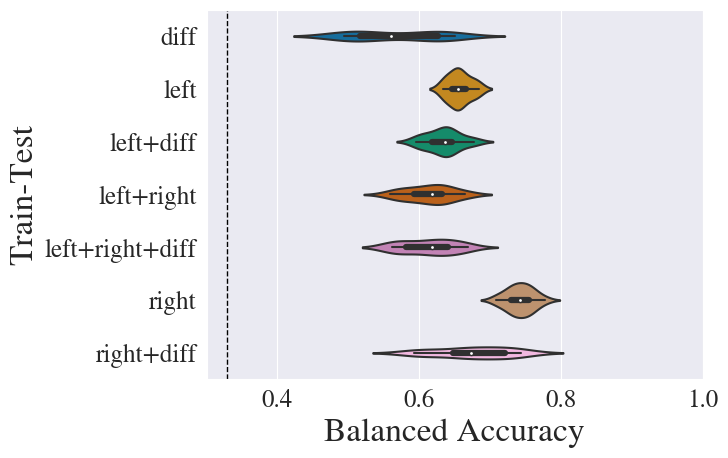

In [9]:
make_violin_accuracy(
    data=all_seed_avgs_onlysameside,
    # path_to_save_fig="../final_visualizations/violin_loso_bilateral_accuracy_usilaughs.pdf",
    xlim=(0.3,1),
    small_fontsize=18, 
    medium_fontsize=24,
    large_fontsize=25,
    dummy_val=mean_dummy,
)



In [11]:
average_acc = all_seed_avgs.groupby('Train-Test')['Balanced Accuracy'].mean()
# NOTE: this error estimation is not actually correct.
err_acc = all_seed_avgs.groupby('Train-Test')['Balanced Accuracy'].std() / (all_seed_avgs.groupby('Train-Test')['Balanced Accuracy'].count().apply(lambda x: x**0.5))
for i in range(len(average_acc)):
    # print accuracy with format '0.2f' (2 decimal places)
    print('Average accuracy for {} side: {:.2f} ± {:.2f}'.format(average_acc.index[i], average_acc[i]*100, err_acc[i]*100))

Average accuracy for 'left' -- 'diff' side: 56.00 ± 0.63
Average accuracy for 'left' -- 'right' side: 75.12 ± 0.72
Average accuracy for 'left+diff' -- 'right+diff' side: 73.75 ± 0.53
Average accuracy for 'left+right' -- 'left+diff' side: 57.83 ± 0.72
Average accuracy for 'left+right' -- 'right+diff' side: 64.58 ± 0.72
Average accuracy for 'right' -- 'diff' side: 52.10 ± 0.63
Average accuracy for diff -- diff side: 56.82 ± 1.54
Average accuracy for left -- left side: 65.67 ± 0.39
Average accuracy for left+diff -- left+diff side: 63.41 ± 0.59
Average accuracy for left+right -- left+right side: 61.40 ± 0.81
Average accuracy for left+right+diff -- left+right+diff side: 61.28 ± 0.92
Average accuracy for right -- right side: 74.22 ± 0.46
Average accuracy for right+diff -- right+diff side: 67.61 ± 1.28


In [12]:
max_acc = all_seed_avgs.groupby('Train-Test').max()
display(max_acc)

,Model,Random Seed,Balanced Accuracy
Train-Test,,,
'left' -- 'diff',XGBClassifier,7,0.605208
'left' -- 'right',XGBClassifier,7,0.801326
'left+diff' -- 'right+diff',XGBClassifier,7,0.777083
'left+right' -- 'left+diff',XGBClassifier,7,0.648106
'left+right' -- 'right+diff',XGBClassifier,7,0.697159
'right' -- 'diff',XGBClassifier,7,0.569792
diff -- diff,XGBClassifier,7,0.650000
left -- left,XGBClassifier,7,0.684091
left+diff -- left+diff,XGBClassifier,7,0.676989


### Statistical Tests

In [29]:
all_results_no_dummy["Train-Test"].unique().tolist()

["'left' -- 'diff'",
 "'left' -- 'right'",
 "'left+diff' -- 'right+diff'",
 "'left+right' -- 'left+diff'",
 "'left+right' -- 'right+diff'",
 "'right' -- 'diff'",
 'diff -- diff',
 'left+diff -- left+diff',
 'left+right+diff -- left+right+diff',
 'left+right -- left+right',
 'left -- left',
 'right+diff -- right+diff',
 'right -- right']

In [30]:
side_testing = all_results_no_dummy["Train-Test"].unique().tolist()

all_xgb_results = {
    train_test_paradigm: all_results_no_dummy[
        (all_results_no_dummy["Train-Test"] == train_test_paradigm)
        & (all_results_no_dummy["Model"] == "XGBClassifier")
    ]
    for train_test_paradigm in side_testing
}

# get all possible combinations for the side_testing list

side_combinations = list(itertools.combinations(side_testing, 2))

Shapiro-Wilk test for normality on data set 'left' -- 'diff':
ShapiroResult(statistic=0.9853715896606445, pvalue=2.8525008061282624e-19)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


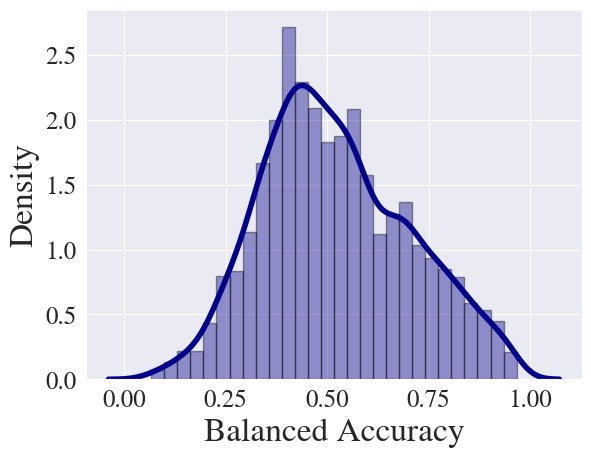

Anderson-Darling test for normality on data set 'left' -- 'diff':
AndersonResult(statistic=17.30719974551721, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.5220266666666666, scale=0.18202440389521407)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set 'left' -- 'right':
ShapiroResult(statistic=0.9449706673622131, pvalue=2.6829677065653524e-35)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


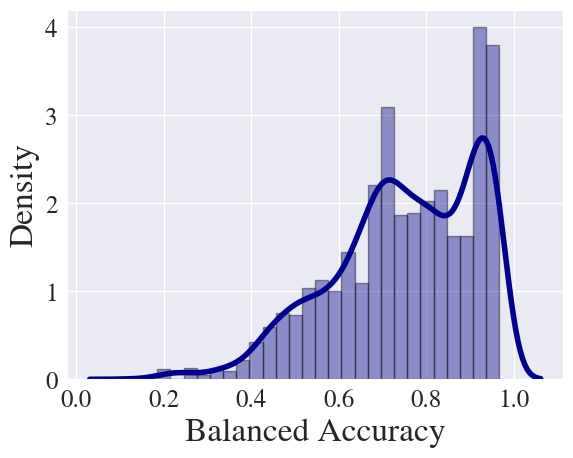

/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Anderson-Darling test for normality on data set 'left' -- 'right':
AndersonResult(statistic=47.4010962174425, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7485866666666666, scale=0.16261878510443392)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set 'left+diff' -- 'right+diff':
ShapiroResult(statistic=0.9041345119476318, pvalue=1.555441295400547e-43)


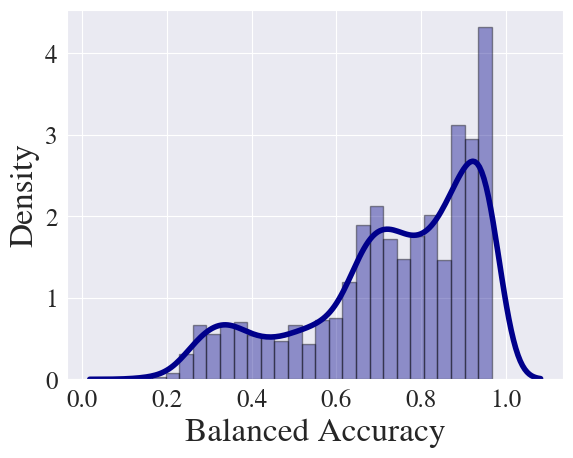

Anderson-Darling test for normality on data set 'left+diff' -- 'right+diff':
AndersonResult(statistic=104.49318249917178, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7315222222222222, scale=0.19881673479602396)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set 'left+right' -- 'left+diff':
ShapiroResult(statistic=0.9489773511886597, pvalue=3.024185591988364e-34)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


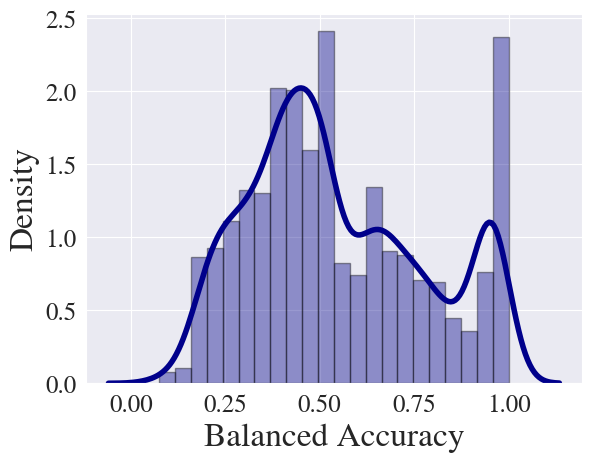

Anderson-Darling test for normality on data set 'left+right' -- 'left+diff':
AndersonResult(statistic=57.37566525566535, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.5448755555555556, scale=0.23162327788212608)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set 'left+right' -- 'right+diff':
ShapiroResult(statistic=0.9553146362304688, pvalue=1.9315510114360742e-32)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


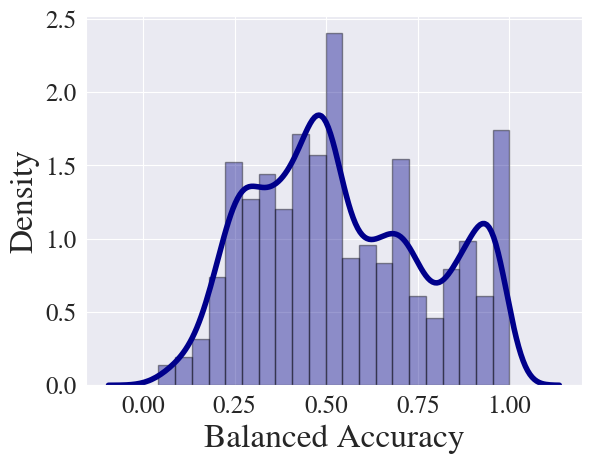

Anderson-Darling test for normality on data set 'left+right' -- 'right+diff':
AndersonResult(statistic=46.05471796492884, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.5455155555555555, scale=0.235979123662624)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set 'right' -- 'diff':
ShapiroResult(statistic=0.9630018472671509, pvalue=5.8498685136467844e-30)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


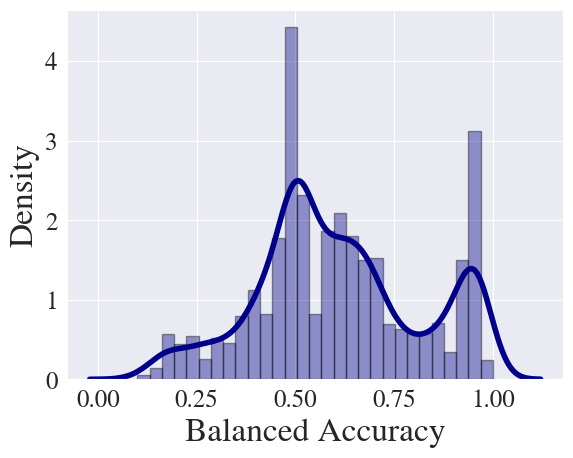

Anderson-Darling test for normality on data set 'right' -- 'diff':
AndersonResult(statistic=43.890225766575895, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6066755555555555, scale=0.20840678867448767)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set diff -- diff:
ShapiroResult(statistic=0.9719980359077454, pvalue=1.734765835892852e-26)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


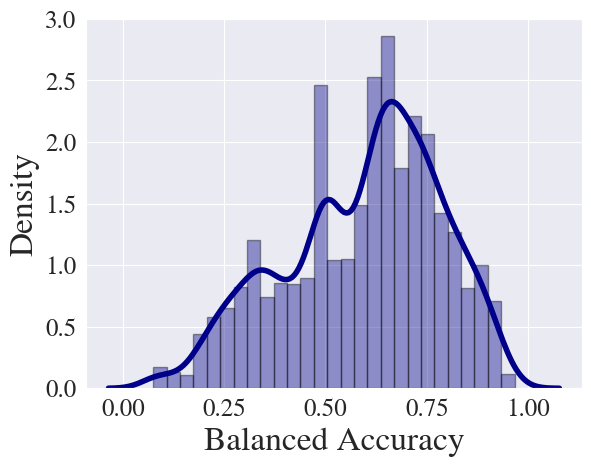

Anderson-Darling test for normality on data set diff -- diff:
AndersonResult(statistic=31.840161850779168, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.5936755555555556, scale=0.1910224693851581)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set left+diff -- left+diff:
ShapiroResult(statistic=0.9351324439048767, pvalue=1.2081756578150252e-37)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


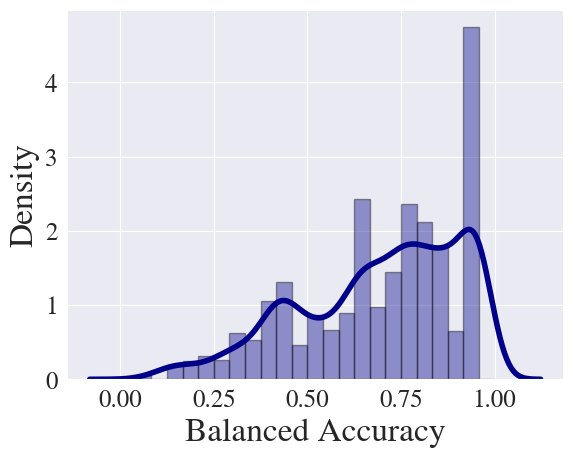

Anderson-Darling test for normality on data set left+diff -- left+diff:
AndersonResult(statistic=64.8982180840544, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.693091111111111, scale=0.2128758107672081)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set left+right+diff -- left+right+diff:
ShapiroResult(statistic=0.9042913913726807, pvalue=1.6535321879032841e-43)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


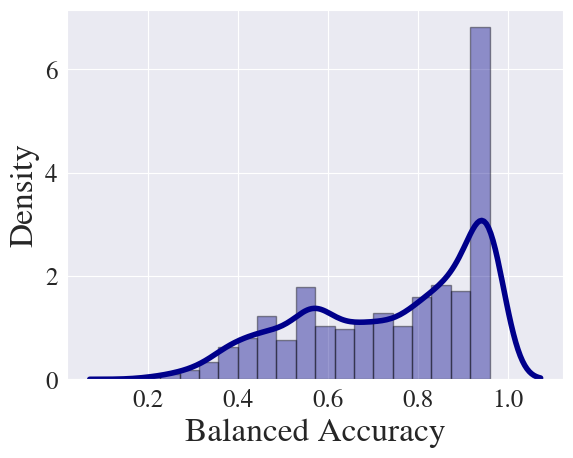

/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Anderson-Darling test for normality on data set left+right+diff -- left+right+diff:
AndersonResult(statistic=116.19979534087543, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7397244444444444, scale=0.1963384927876748)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set left+right -- left+right:
ShapiroResult(statistic=0.9071269035339355, pvalue=4.8765186558503634e-43)


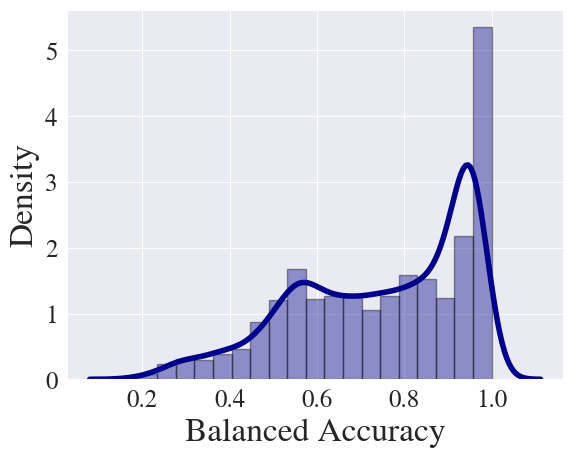

/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Anderson-Darling test for normality on data set left+right -- left+right:
AndersonResult(statistic=108.58977197666673, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.745348888888889, scale=0.1939655655273265)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set left -- left:
ShapiroResult(statistic=0.9535946249961853, pvalue=5.984229783711133e-33)


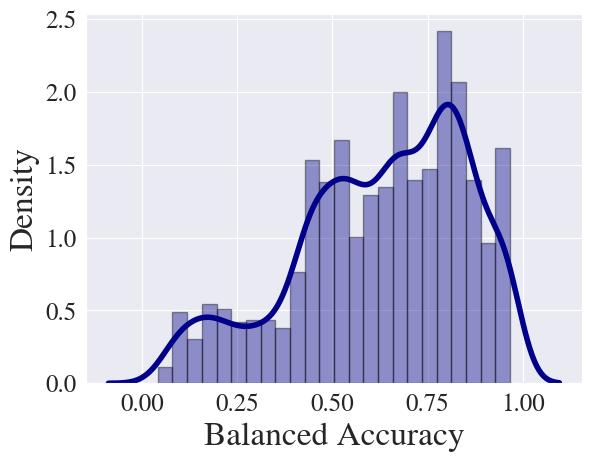

Anderson-Darling test for normality on data set left -- left:
AndersonResult(statistic=41.75298962144461, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6286711111111111, scale=0.22400152046202604)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set right+diff -- right+diff:
ShapiroResult(statistic=0.9119542837142944, pvalue=3.2678280188054734e-42)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


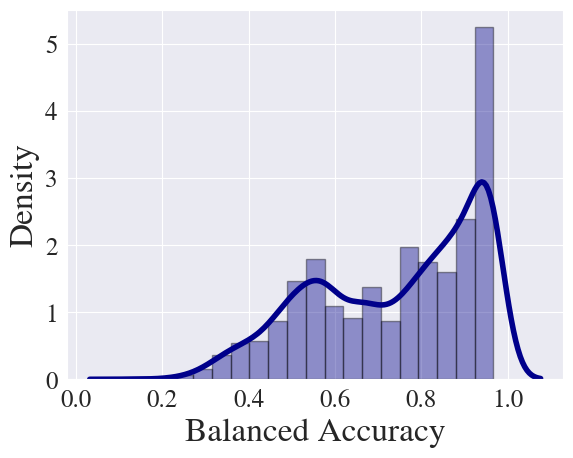

Anderson-Darling test for normality on data set right+diff -- right+diff:
AndersonResult(statistic=106.50049819871901, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7410666666666667, scale=0.18862351760073534)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set right -- right:
ShapiroResult(statistic=0.9142710566520691, pvalue=8.390975204377005e-42)


/Users/leonardoalchieri/mambaforge/envs/laugh/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


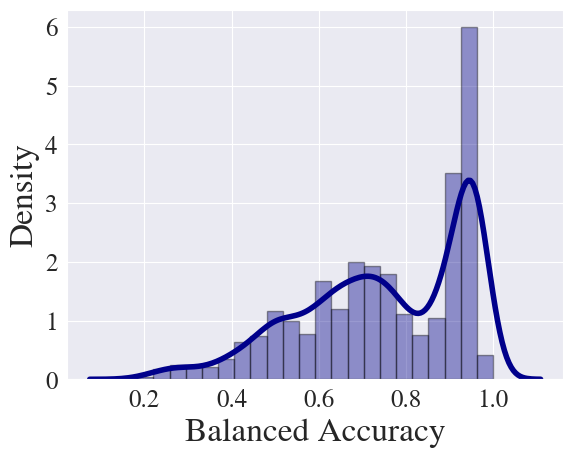

Anderson-Darling test for normality on data set right -- right:
AndersonResult(statistic=96.20835281553445, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7496755555555555, scale=0.18808517232374358)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [34]:
test_normality(all_xgb_results=all_xgb_results)

Statistical tests say that the distributions are not normal. But upon visual inspection, they are not far from a normal. As such, the t-test should be able handle this data, since with n>30 it is still robust to non-normality.

In [31]:
def get_side_val(val: str, idx: int) -> str:
    return val.split("--")[idx].replace(" ", "").replace("'", "")

side_combinations_only_same = [
    val
    for val in side_combinations 
    if (get_side_val(val[0], 0) == get_side_val(val[0], 1) and
    get_side_val(val[1], 0) == get_side_val(val[1], 1))
]

In [32]:
t_test_results = corrected_t_test(all_xgb_results=all_xgb_results, 
                               side_combinations=side_combinations_only_same, n1=n1, n2=n2)
t_test_results = pd.DataFrame.from_dict(t_test_results, orient='index', columns=['t', 'p-value', 'p > 0.05'])

In [33]:
t_test_results

,t,p-value,p > 0.05
"(diff -- diff, left+diff -- left+diff)",-1.863115,0.812808,False
"(diff -- diff, left+right+diff -- left+right+diff)",-2.827925,0.084775,False
"(diff -- diff, left+right -- left+right)",-2.981785,0.057681,False
"(diff -- diff, left -- left)",-0.637319,1.000000,False
"(diff -- diff, right+diff -- right+diff)",-2.962750,0.058293,False
"(diff -- diff, right -- right)",-3.135519,0.036302,True
"(left+diff -- left+diff, left+right+diff -- left+right+diff)",-0.865056,1.000000,False
"(left+diff -- left+diff, left+right -- left+right)",-0.972424,1.000000,False
"(left+diff -- left+diff, left -- left)",1.113529,1.000000,False
"(left+diff -- left+diff, right+diff -- right+diff)",-0.894673,1.000000,False


This t test evaluated the mean and standard deviation directly. However, a stronger approach would be to use the calculate standard deviation. I perform this in the average part.

In [110]:
t_test_results.index = pd.MultiIndex.from_tuples(t_test_results.index, names=['1st', '2nd'])
pd.set_option('display.max_rows', 500)
display(t_test_results.loc[pd.IndexSlice["left+right -- left+right"], :])
display(t_test_results.loc[pd.IndexSlice["left+right+diff -- left+right+diff"], :])

,t,p-value,p > 0.05
2nd,,,
left -- left,2.115314,0.551495,False
right+diff -- right+diff,0.085368,1.000000,False
right -- right,-0.086061,1.000000,False


,t,p-value,p > 0.05
2nd,,,
left+right -- left+right,-0.110407,1.000000,False
left -- left,2.007296,0.627049,False
right+diff -- right+diff,-0.026512,1.000000,False
right -- right,-0.197185,1.000000,False


## MWC2022

In [34]:
n_tot = 4873
n1 = 5/6 * n_tot
n2 = 1/6 * n_tot

In [35]:
path_to_save_data_avgs = "../data.nosync/mwc2022/results/loso_nested_all_bilateral.h5"

order = [
    "Left-Left",
    "Right-Right",
    "Left-Right",
    "Right-Left",
]
# Create an empty dictionary to store the loaded DataFrames
all_results = load_prepare_data(path_to_save_data_avgs, n_folds=7)
all_results_no_dummy = remove_dummy(data=all_results)
all_results_no_dummy = clean_side_names(data=all_results_no_dummy)


Loading data:   0%|          | 0/5250 [00:00<?, ?it/s]

In [36]:
dummy_mean = all_results[all_results['Model'] == 'DummyClassifier'].mean()

In [37]:
make_violin_accuracy(
    data=all_results_no_dummy,
    sides=order,
    path_to_save_fig="../final_visualizations/violin_loso_BILATERSL_accuracy_mwc2022.pdf",
    xlim=(0.3,1),
    small_fontsize=18, 
    medium_fontsize=24,
    large_fontsize=25,
    dummy_val=dummy_mean,
)


TypeError: make_violin_accuracy() got an unexpected keyword argument 'sides'

In [68]:
average_acc = all_results_no_dummy.groupby('Train-Test')['Balanced Accuracy'].mean()
# NOTE: this error estimation is not actually correct.
err_acc = all_results_no_dummy.groupby('Train-Test')['Balanced Accuracy'].std() / (all_results_no_dummy.groupby('Train-Test')['Balanced Accuracy'].count().apply(lambda x: x**0.5))
for i in range(len(average_acc)):
    # print accuracy with format '0.2f' (2 decimal places)
    print('Average accuracy for {} side: {:.2f} ± {:.2f}'.format(average_acc.index[i], average_acc[i]*100, err_acc[i]*100))

Average accuracy for Left-Left side: 72.46 ± 0.08
Average accuracy for Left-Right side: 67.30 ± 0.07
Average accuracy for Right-Left side: 71.33 ± 0.08
Average accuracy for Right-Right side: 67.60 ± 0.08


In [69]:
max_acc = all_results_no_dummy.groupby('Train-Test').max()
display(max_acc)

,Model,Balanced Accuracy,Standard Error,Standard Deviation
Train-Test,,,,
Left-Left,XGBClassifier,0.814774,0.059980,0.158692
Left-Right,XGBClassifier,0.768009,0.053761,0.142238
Right-Left,XGBClassifier,0.815238,0.075613,0.200054
Right-Right,XGBClassifier,0.764769,0.068968,0.182472


### Statistical Tests

In [11]:
side_testing = all_results_no_dummy["Train-Test"].unique().tolist()

all_xgb_results = {
    train_test_paradigm: all_results_no_dummy[
        (all_results_no_dummy["Train-Test"] == train_test_paradigm)
        & (all_results_no_dummy["Model"] == "XGBClassifier")
    ]
    for train_test_paradigm in side_testing
}

# get all possible combinations for the side_testing list

side_combinations = list(itertools.combinations(side_testing, 2))

Shapiro-Wilk test for normality on data set Left-Left:
ShapiroResult(statistic=0.9895063042640686, pvalue=0.46040183305740356)


/Users/leonardoalchieri/miniconda3/envs/laugh2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


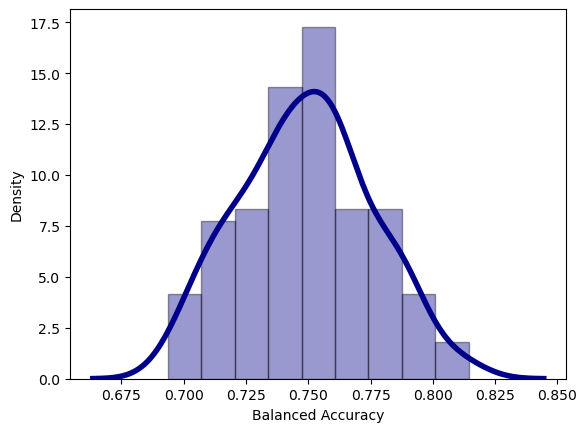

Anderson-Darling test for normality on data set Left-Left:
AndersonResult(statistic=0.2840236595669836, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7489844970607479, scale=0.02633925593098169)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set Right-Right:
ShapiroResult(statistic=0.9598654508590698, pvalue=0.0009309295564889908)


/Users/leonardoalchieri/miniconda3/envs/laugh2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


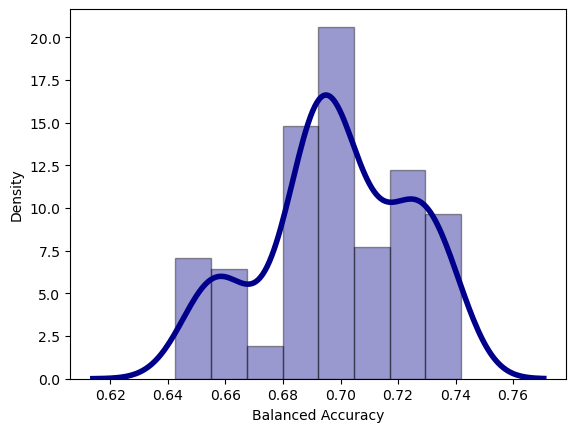

/Users/leonardoalchieri/miniconda3/envs/laugh2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Anderson-Darling test for normality on data set Right-Right:
AndersonResult(statistic=1.3770520393777446, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6985820481242052, scale=0.02516422055682459)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set Left-Right:
ShapiroResult(statistic=0.9923480749130249, pvalue=0.7289663553237915)


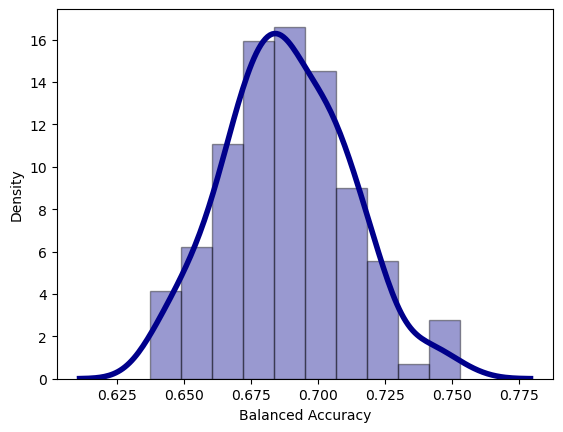

Anderson-Darling test for normality on data set Left-Right:
AndersonResult(statistic=0.17762974873824078, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6883235998363505, scale=0.023006737415448012)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Shapiro-Wilk test for normality on data set Right-Left:
ShapiroResult(statistic=0.9836219549179077, pvalue=0.13589118421077728)


/Users/leonardoalchieri/miniconda3/envs/laugh2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


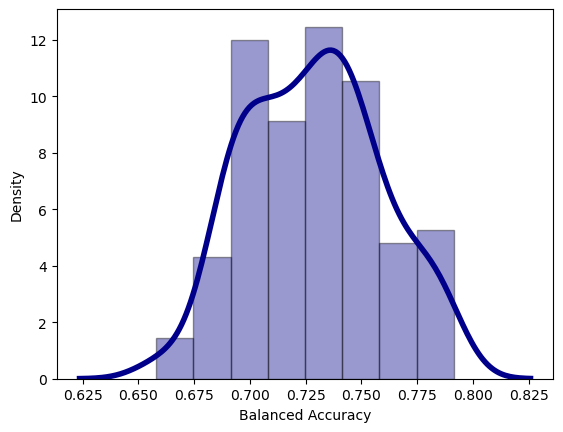

Anderson-Darling test for normality on data set Right-Left:
AndersonResult(statistic=0.4984978114951133, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.7286920597298024, scale=0.030069474950057257)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [12]:
test_normality(all_xgb_results=all_xgb_results)

Statistical tests say that the distributions are not normal. But upon visual inspection, they are not far from a normal. As such, the t-test should be able handle this data, since with n>30 it is still robust to non-normality.

In [13]:
t_test_results = corrected_t_test(all_xgb_results=all_xgb_results, side_combinations=side_combinations, n1=n1, n2=n2)

This t test evaluated the mean and standard deviation directly. However, a stronger approach would be to use the calculate standard deviation. I perform this in the average part.

In [14]:
t_test_results

{('Left-Left', 'Right-Right'): (3.0850313773375775,
  0.012453701073613179,
  False),
 ('Left-Left', 'Left-Right'): (3.4939405088068898,
  0.003916351264317395,
  False),
 ('Left-Left', 'Right-Left'): (1.1334394644880925, 0.5182636679078748, True),
 ('Right-Right', 'Left-Right'): (0.6425161831878464, 0.5216783760652243, True),
 ('Right-Right', 'Right-Left'): (-1.573272362765598, 0.354315664757323, True),
 ('Left-Right', 'Right-Left'): (-2.2837938086146097,
  0.09607277060124171,
  False)}